# Stroke Prediction Notebook


## Table of content

1. [Introduction](#1.-Introduction)
2. [Data Overview](#2.-Data Overview)
3. [Exploratory Data Analysis](#3.-Exploratory Data Analysis)
4. [Supervised Learning](#4.-Supervised Learning)
     4.1 [Performance metrics used](#4.1-Performance metrics used)
     4.2 [Results and analysis](#4.2-Results and analysis)
     4.3 [Strengths and weaknesses of each model](#4.3-asf)
5. [Unsupervised Learning](#5.-Introduction)
     5.1 [Summary of findings](#5.1-Introduction)
     5.2 [Recommendations for future work](#5.2-Introduction)
     5.3 [Limitations and challenges](#5.3-Introduction)
6. [References](#6.-Introduction)

## 1. Introduction 

Stroke is a life-threatening medical condition that occurs when blood flow to the brain is interrupted. It is the second leading cause of death and a major cause oof long-term disability worldwide. Early detection and prevention of stroke are crucial to reducing its impact on the individuals and society.

The Stroke Prediction Dataset on Kaggle provides a collection of health-related data that can be used to predict the likelihood of an individual experiencing a stroke. The dataset includes demographic, lifestyle, and clinical variables such as age, gender, smoking status, hypertension, heart disease, and glucose levels, among others. The dataset contains data from over 43,000 individuals across 12 countries.


We can access the dataset on Kaggle:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset




<h4>Attribute Information </h4>

The Stroke Prediction Dataset contains 12 features (or columns) and 5110 instances (or rows). Here's a brief description of each feature:

1.	id:               unique identifier
2.	gender:           "Male", "Female", or "Other"
3.	age:               age of the individual in years
4.	hypertension:      1 if yes, 0 otherwise
5.	heart_disease:     1 if yes, 0 otherwise
6.	ever_married:      "Yes" or "No"
7.	work_type:         "Private", "Self-employed", "Govt_job", "Children", or "Never_worked"
8.	Residence_type:    "Urban" or "Rural"
9.	avg_glucose_level: average glucose level in blood
10.	bmi:               body mass index
11.	smoking_status:    "formerly smoked", "never smoked", "smokes", or "Unknown"
12.	stroke:            1 if the individual had a stroke, 0 otherwise


This dataset can be used to explore the relationships between these variables and the likelihood of experiencing a stroke, as well as to develop predictive models to identify high-risk individuals who may benefit from early interventions.


## 2. Data Overview

We start by including the basic libraries for the data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("/Users/ash/Downloads/healthcare-dataset-stroke-data 2.csv")

After storing the dataset into 'df' I have removed the column 'id' as it serves no purpose in our analysis

In [3]:
df.drop(columns=['id'],inplace = True,axis = 1)

Here we can see the initial and the last 5 rows of our dataset. We do this just by stating the variable name of the dataset.

In [4]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<h3> -> Questions to ask</h3>
<h5> 1) Male/Female who has more strokes.</h5>
<h5> 2) People of which age group are more likely to get a stroke.</h5>
<h5> 3) Is hypertension a cause?</h5>
<h5> 4) A person with heart disease is more likely to get a stroke (need confirmation).</h5>
<h5> 5) Marriage may be a cause of strokes.</h5>
<h5> 6) People working in private jobs may be the majority of people with strokes(mostly cause of stress).</h5>
<h5> 7) Evaluating the neumerical variables with the target variable</h5>
<h5> 8) People living in urban areas have more chances of getting stroke?</h5>
<h5> 9) BMI must be closely observed with age and gender.</h5>
<h5>10) People who smoke are more likely to get a stroke (need confirmation).</h5>

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
print(df.shape)

(5110, 11)


In [7]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observations :
<p>1.BMI contains missing values.</p>
<p>2.The average age is 43.</p>
<p>3.The average bmi is 28 (will change after imputation).</p>
<p>4.The minimum age is questionable.</p>
<p>5.Average glucose level is 106 (can be useful later).</p>

# 3. Exploratory Data Analysis  

In this part I have Done EDA for our data

In [9]:
df=df.fillna(np.mean(df['bmi']))

We handled missing values and filled the missing values with the mean.

In [10]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [11]:
print(df.shape)

(5110, 11)


In [12]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


<AxesSubplot:xlabel='stroke', ylabel='count'>

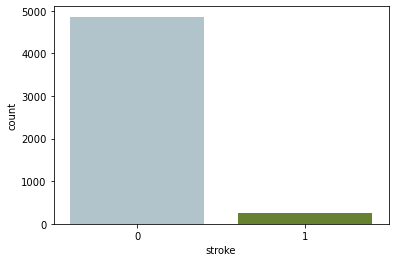

In [13]:
colors = ["#AEC6CF","#6B8E23", "#B39EB5", "#C44E52"]
sns.countplot(data=df,x='stroke', palette=colors)

### 1) Male/Female who has more strokes.

Text(0.5, 1.0, 'The division of data by Geder')

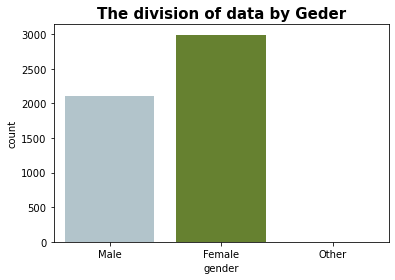

In [14]:
sns.countplot(x="gender", data=df, palette=colors)
plt.title ("The division of data by Geder",weight='bold', size=15)

In [15]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [16]:
df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Male' else 0) 

0    2995
1    2115
Name: gender, dtype: int64

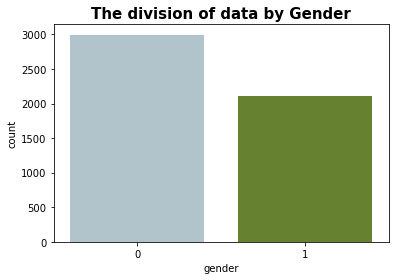

In [17]:
sns.countplot(x="gender", data=df, palette=colors)
plt.title ("The division of data by Gender",weight='bold', size=15)
df['gender'].value_counts()

### 2) People of which age group are more likely to get a stroke.


In [18]:
# Group the data by age and count the number of strokes in each age group
age_counts = df.loc[df['stroke'] == 1, 'age'].value_counts()

# Print the 10 age groups with the highest stroke counts
print(age_counts.head(10))


78.0    21
80.0    17
79.0    17
81.0    14
57.0    11
76.0    10
63.0     9
74.0     9
68.0     9
82.0     9
Name: age, dtype: int64


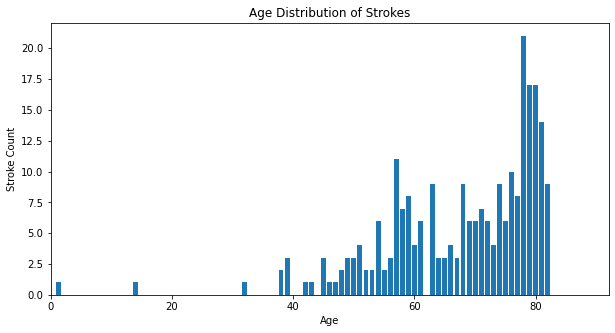

In [19]:
# Plot a bar chart of the age counts
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(age_counts.index, age_counts.values)

# Set the chart title and axis labels
ax.set_title('Age Distribution of Strokes')
ax.set_xlabel('Age')
ax.set_ylabel('Stroke Count')

# Set the x-axis to start from 0 and end at the maximum age plus 10 years
ax.set_xlim([0, max(age_counts.index) + 10])

# Show the plot
plt.show()


### 3) Is hypertension a cause?

Text(-0.7, 220, 'Hypertension and Stroke')

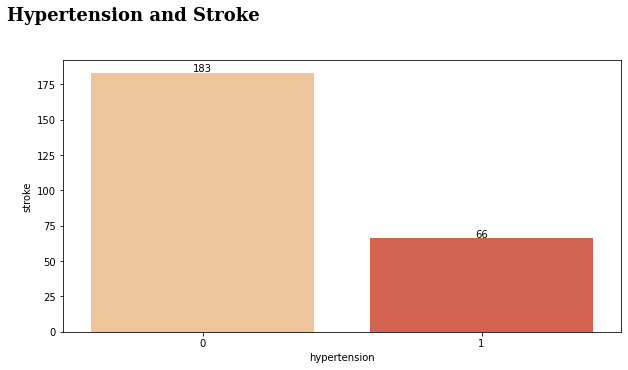

In [20]:
# create a pivot table with stroke count by hypertension
pd_stroke = pd.pivot_table(data=df[df['stroke']==1], index=df['hypertension'], values='stroke', aggfunc='count').reset_index()

# set figure and plot size
fig, ax = plt.subplots(figsize=(10, 5))

# create bar plot with seaborn
sns.barplot(ax=ax, x=pd_stroke['hypertension'], y=pd_stroke['stroke'], palette='OrRd')

# add text labels for each bar
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')


# add plot title
plt.text(-0.7, 220, 'Hypertension and Stroke', fontsize=18, fontweight='bold', fontfamily='serif')



### 4) A person with heart disease is more likely to get a stroke.

Text(-0.7, 220, 'Heart Disease and Stroke')

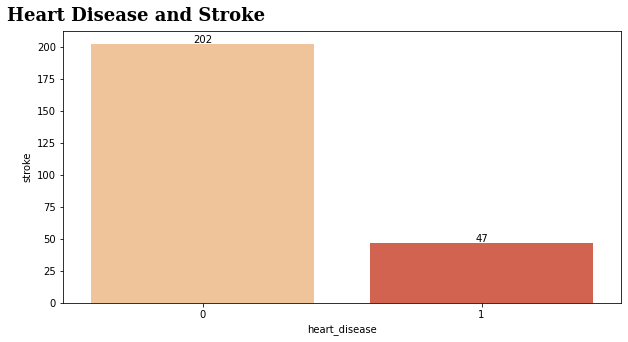

In [21]:
# create a pivot table with stroke count by heart disease
pd_stroke = pd.pivot_table(data=df[df['stroke']==1], index=df['heart_disease'], values='stroke', aggfunc='count').reset_index()

# set figure and plot size
fig, ax = plt.subplots(figsize=(10, 5))

# create bar plot with seaborn
sns.barplot(ax=ax, x=pd_stroke['heart_disease'], y=pd_stroke['stroke'], palette='OrRd')

# add text labels for each bar
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')


# add plot title
plt.text(-0.7, 220, 'Heart Disease and Stroke', fontsize=18, fontweight='bold', fontfamily='serif')



### 5) Marriage may be a cause of strokes

<AxesSubplot:xlabel='ever_married', ylabel='count'>

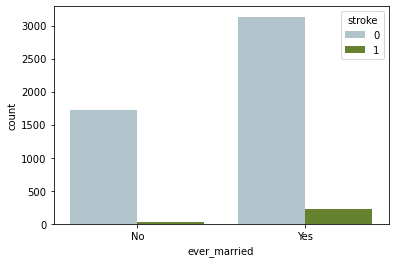

In [22]:
# Group the data by stroke and marriage columns, and count the number of occurrences in each group
pd_stroke_marriage = df.groupby(['stroke', 'ever_married'])['stroke'].count().reset_index(name='count')

# Plot a grouped bar plot
sns.barplot(x='ever_married', y='count', hue='stroke', data=pd_stroke_marriage , palette = colors)


### 6) People working in private jobs may be the majority of people with strokes(mostly cause of stress).

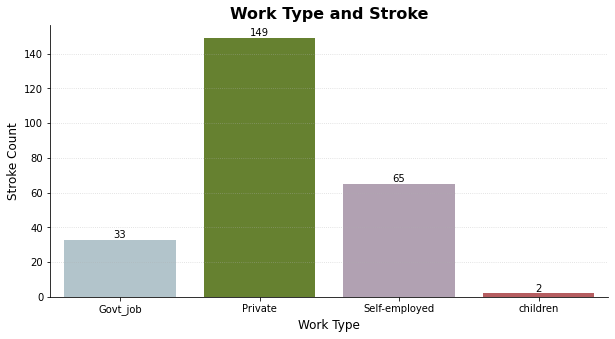

In [23]:
# Create a pivot table for stroke count by work type
pd_stroke = df[df['stroke'] == 1].pivot_table(index='work_type', values='stroke', aggfunc='count').reset_index()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='work_type', y='stroke', data=pd_stroke, palette=colors, ax=ax)

# Add labels and formatting
ax.set_xlabel('Work Type', fontsize=12)
ax.set_ylabel('Stroke Count', fontsize=12)
ax.set_title('Work Type and Stroke', fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle=':', alpha=0.5)
sns.despine()

# Add data labels to the bars
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), ha='center', fontsize=10)


### 7) Evaluating the neumerical variables with the target variable

In [24]:
# Classifying data into numerical and categorical variables.
df_numerical=df[['age','avg_glucose_level','bmi']]
df_categorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

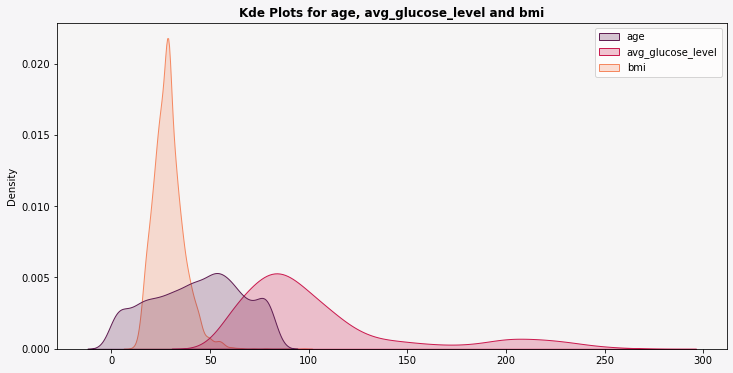

In [25]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7') ## colour outside the graph 
ax.set_facecolor('#f6f5f5') ##colour inside the graph
sns.kdeplot(data=df_numerical,shade=True,palette='rocket') # Distributions

plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')

In [26]:
# Skewness and kurtosis
s_k=[]
for i in df_numerical.columns:
    s_k.append([i,df_numerical[i].skew(),df_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.137059,-0.991010
1,avg_glucose_level,1.572284,1.680479
2,bmi,1.076716,3.623061


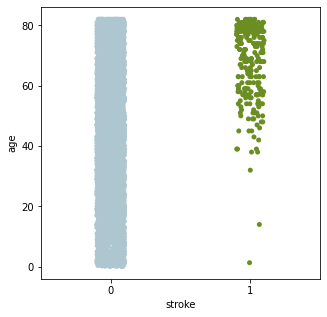

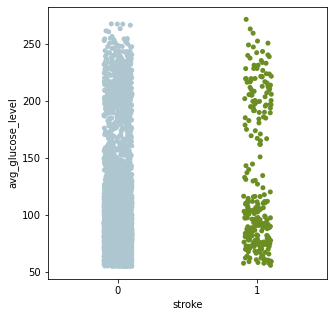

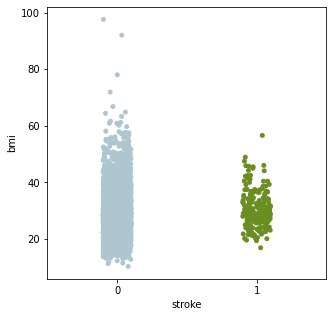

In [27]:
# Strip plot of numerical variables with respect to stroke
for col in df_numerical.columns:
    plt.figure(figsize=(5,5))
    sns.stripplot(data=df, x='stroke', y=col , palette = colors)
    plt.show()



### 8) People living in urban areas have more chances of getting stroke? (need to confirm)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

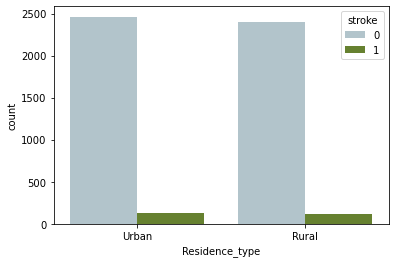

In [28]:
import seaborn as sns

# Create a bar plot of stroke counts based on residence type
sns.countplot(data=df, x='Residence_type', hue='stroke', palette = colors)


### 9) BMI must be closely observed with age and gender.

<AxesSubplot:xlabel='age', ylabel='bmi'>

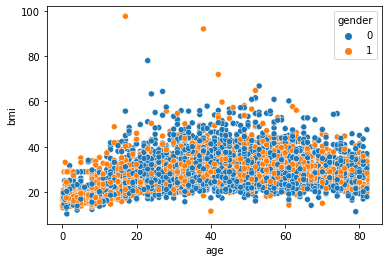

In [29]:
#In this scatterplot we can observe the relationship between age, bmi and gender.
sns.scatterplot(data=df, x="age", y="bmi", hue="gender")


### 10) People who smoke are more likely to get a stroke (need confirmation).

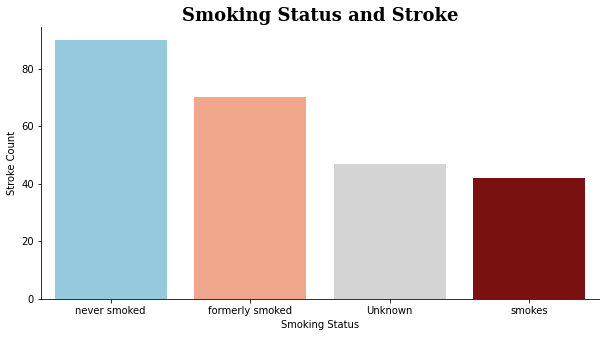

In [30]:
pd_stroke = df[df['stroke']==1]['smoking_status'].value_counts().reset_index()
pd_stroke.columns = ['smoking_status', 'stroke_count']
colors1 = ["#87CEEB","#FFA07A","#D4D4D4","#8B0000"]
plt.figure(figsize=(10, 5))
sns.barplot(data=pd_stroke, x='smoking_status', y='stroke_count', palette = colors1)
plt.title('Smoking Status and Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Count')
sns.despine()
plt.show()


### Correlation 

Text(0.5, 1.0, 'kendall correlation')

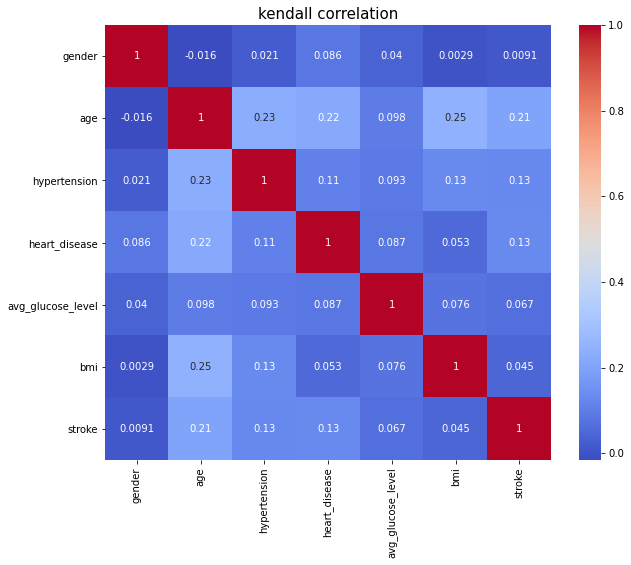

In [31]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(method = "kendall"), cmap = 'coolwarm', annot = True);
plt.title("kendall correlation",fontsize = 15)

Text(0.5, 1.0, 'Spearmen correlation')

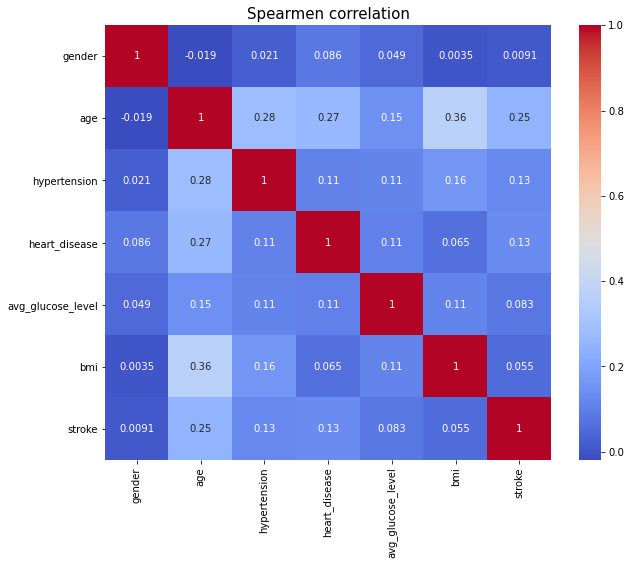

In [32]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(method = "spearman"), cmap = 'coolwarm', annot = True);
plt.title("Spearmen correlation",fontsize = 15)

# Data Preprocessing

In [33]:
# Convert categorical variables to binary variables
# We already converted gender above
df['Residence_type'] = df['Residence_type'].apply(lambda x : 1 if x == 'Urban' else 0)
df['ever_married'] = df['ever_married'].apply(lambda x : 1 if x == 'Yes' else 0)

# Remove observations with unknown smoking status
df = df[df['smoking_status'] != 'Unknown']


In [34]:
# One Hot encoding smoking_status, work_type
df_dummies = df[['smoking_status','work_type']]
df_dummies=pd.get_dummies(df_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

In [35]:
df_stroke=df['stroke']
df.drop(columns=['stroke'],inplace=True)
df=df.merge(df_dummies,left_index=True, right_index=True,how='left')

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,df_stroke,test_size=0.25,random_state=0)

In [37]:
# Standardizing our training and testing data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#We perform feature scaling after splitting the data into training and testing sets in order to avoid data leakage.

In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

In [39]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,0,77.93,21.700000,0,1,0,0,0,1,0,0
5105,0,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,1,0


In [40]:
##Importing the models

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
models = dict()
models['Dicision Tree'] = DecisionTreeClassifier(class_weight={0:1,1:2})
models['Random Forest'] = RandomForestClassifier(class_weight={0:1,1:2})
models['Logreg'] = LogisticRegression()
models['GradientBoost'] = GradientBoostingClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['XGBoost'] = xgboost.XGBClassifier()
models['SVM']= SVC(probability=True)
models['KNeighbors']= KNeighborsClassifier()

In [42]:
for model in models:
    models[model].fit(x_train, y_train)
    print(model + ' : fit')

Dicision Tree : fit
Random Forest : fit
Logreg : fit
GradientBoost : fit
AdaBoost : fit
XGBoost : fit
SVM : fit
KNeighbors : fit


In [43]:
 print("Train set prediction")
for x in models:
        
    print('------------------------'+x+'------------------------')
    model = models[x]
    y_train_pred = model.predict(x_train)
    arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
    print(confusion_matrix(**arg_train))
    print(classification_report(**arg_train))

Train set prediction
------------------------Dicision Tree------------------------
[[2521    0]
 [   0 2521]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2521
           1       1.00      1.00      1.00      2521

    accuracy                           1.00      5042
   macro avg       1.00      1.00      1.00      5042
weighted avg       1.00      1.00      1.00      5042

------------------------Random Forest------------------------
[[2521    0]
 [   0 2521]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2521
           1       1.00      1.00      1.00      2521

    accuracy                           1.00      5042
   macro avg       1.00      1.00      1.00      5042
weighted avg       1.00      1.00      1.00      5042

------------------------Logreg------------------------
[[1819  702]
 [ 463 2058]]
              precision    recall  f1-score   support

          

In [44]:
#The performance on train set is (too) good. That's because we use SMOTE. It makes model learn very well because of having a perfect balance dataset.
#Next, see the performance in test set.

In [45]:
print("Test set prediction")
for x in models:
        
    print('------------------------'+x+'------------------------')
    model = models[x]
    y_test_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test set prediction
------------------------Dicision Tree------------------------
[[742 101]
 [ 40   9]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       843
           1       0.08      0.18      0.11        49

    accuracy                           0.84       892
   macro avg       0.52      0.53      0.51       892
weighted avg       0.90      0.84      0.87       892

------------------------Random Forest------------------------
[[796  47]
 [ 41   8]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       843
           1       0.15      0.16      0.15        49

    accuracy                           0.90       892
   macro avg       0.55      0.55      0.55       892
weighted avg       0.91      0.90      0.90       892

------------------------Logreg------------------------
[[626 217]
 [ 16  33]]
              precision    recall  f1-score   support

           0       0.98

In [46]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,0,77.93,21.700000,0,1,0,0,0,1,0,0
5105,0,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,1,0


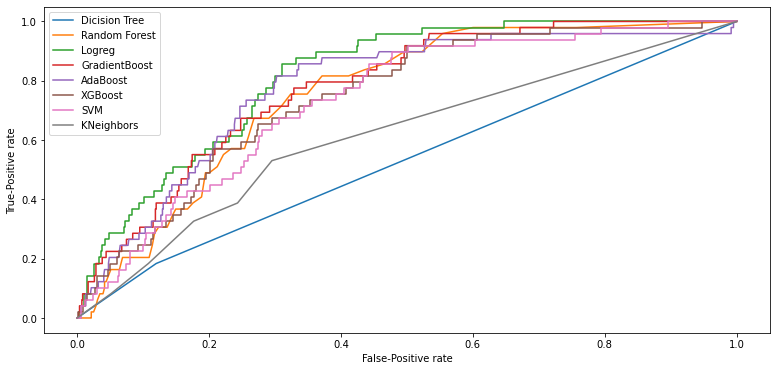

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

fig, ax = plt.subplots()
fig.set_size_inches(13,6)

for m in models:
    y_pred = models[m].predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred[:,1].ravel())
    plt.plot(fpr,tpr, label=m)
plt.xlabel('False-Positive rate')
plt.ylabel('True-Positive rate')
plt.legend()
plt.show()

In [48]:
print('roc_auc_score')
for i in models:
    model = models[i]
    print(i + ' : ',roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]).round(4))

roc_auc_score
Dicision Tree :  0.5319
Random Forest :  0.7564
Logreg :  0.8169
GradientBoost :  0.779
AdaBoost :  0.7771
XGBoost :  0.7467
SVM :  0.7353
KNeighbors :  0.6141


In [49]:
## We can observe from the graph that Logreg (Logistic Regression) gave us the best accuracy.
##It is the best model for our database.

In [50]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Train each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print(f"Confusion matrix for {name}:")
    print(cm)


Confusion matrix for Dicision Tree:
[[746  97]
 [ 40   9]]
Confusion matrix for Random Forest:
[[791  52]
 [ 43   6]]
Confusion matrix for Logreg:
[[626 217]
 [ 16  33]]
Confusion matrix for GradientBoost:
[[769  74]
 [ 35  14]]
Confusion matrix for AdaBoost:
[[685 158]
 [ 23  26]]
Confusion matrix for XGBoost:
[[817  26]
 [ 42   7]]
Confusion matrix for SVM:
[[691 152]
 [ 28  21]]
Confusion matrix for KNeighbors:
[[694 149]
 [ 33  16]]


# Unsupervised Learning

In [51]:
data= pd.read_csv("/Users/ash/Downloads/healthcare-dataset-stroke-data 2.csv")

In [52]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [54]:
mean_value = data['bmi'].mean()
data['bmi'].fillna(value = mean_value, inplace = True) 

In [55]:
data['age'] = (data['age'].apply(np.ceil)).astype('int64')

In [56]:
data['gender'] = data['gender'].apply(lambda x : 1 if x == 'Male' else 0) 

In [57]:
data.drop(data[data.smoking_status == 'Unknown'].index, inplace = True)

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
data['gender'] = data[['gender']].apply(le.fit_transform)
data['ever_married'] = data[['ever_married']].apply(le.fit_transform)
data ['Residence_type'] = data[['Residence_type']].apply(le.fit_transform)
data['work_type'] = data[['work_type']].apply(le.fit_transform)
data ['smoking_status'] = data[['smoking_status']].apply(le.fit_transform)

In [59]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.600000,0,1
1,51676,0,61,0,0,1,3,0,202.21,28.893237,1,1
2,31112,1,80,0,1,1,2,0,105.92,32.500000,1,1
3,60182,0,49,0,0,1,2,1,171.23,34.400000,2,1
4,1665,0,79,1,0,1,3,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,0,57,0,0,1,2,0,77.93,21.700000,1,0
5105,18234,0,80,1,0,1,2,1,83.75,28.893237,1,0
5106,44873,0,81,0,0,1,3,1,125.20,40.000000,1,0
5107,19723,0,35,0,0,1,3,0,82.99,30.600000,1,0


In [60]:
#Extract the data containing children information
nos_of_children = data[data['work_type'] == 4]
nos_of_children_count = nos_of_children['work_type'].count()
print (nos_of_children_count)

nos_of_children.describe()
#There are 69 children in total in the dataset, in age range 10-16.

69


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,69.000000,69.000000,69.000000,69.0,69.0,69.0,69.0,69.000000,69.000000,69.000000,69.000000,69.0
mean,39029.478261,0.507246,12.347826,0.0,0.0,0.0,4.0,0.521739,101.737391,23.111496,0.840580,0.0
std,19473.985582,0.503610,1.634428,0.0,0.0,0.0,0.0,0.503187,34.917983,5.737176,0.441361,0.0
min,4833.000000,0.000000,10.000000,0.0,0.0,0.0,4.0,0.000000,57.280000,15.300000,0.000000,0.0
25%,21209.000000,0.000000,11.000000,0.0,0.0,0.0,4.0,0.000000,81.310000,18.800000,1.000000,0.0
50%,40390.000000,1.000000,12.000000,0.0,0.0,0.0,4.0,1.000000,92.650000,21.600000,1.000000,0.0
75%,54253.000000,1.000000,13.000000,0.0,0.0,0.0,4.0,1.000000,116.250000,25.300000,1.000000,0.0
max,71917.000000,1.000000,16.000000,0.0,0.0,0.0,4.0,1.000000,213.870000,41.700000,2.000000,0.0


In [61]:
data.drop(data[data.work_type == 4].index, inplace = True) #delete the records

number with stroke:  202
number without stroke:  3295


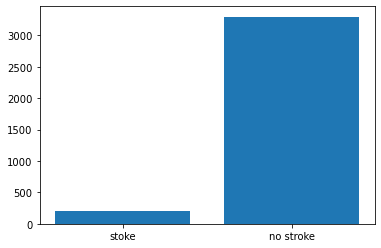

In [62]:
#split the data into those with stroke and without stroke
no_stroke = data[data['stroke'] == 0] #extract the information of those without stroke
no_stroke_extract = no_stroke['stroke'] #extract one column 

yes_stroke = data[data['stroke'] == 1] #extract the information of those with stroke
yes_stroke_extract = yes_stroke['stroke'] #extract one column

count = [yes_stroke_extract.count(), no_stroke_extract.count()]
labels = ('stoke', 'no stroke')

plt.bar(labels, count)
print ("number with stroke: ",yes_stroke_extract.count())
print ("number without stroke: ",no_stroke_extract.count())

In [63]:
#undersampling
class_no_stroke_extract = no_stroke.sample(800) 
sampled_data = pd.concat([class_no_stroke_extract, yes_stroke], axis=0)

#shuffle the data
sampled_data = sampled_data.sample(frac = 1)

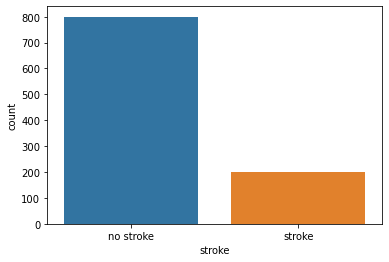

In [64]:
# visualize the output
g = sns.countplot(sampled_data['stroke'])
g.set_xticklabels(['no stroke','stroke'])
plt.show()

In [65]:
#The selected features based on the feature analysis and visualizations
X = sampled_data[['age','bmi', 'avg_glucose_level']] 
Y = sampled_data['stroke']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [67]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.600000,0,1
1,51676,0,61,0,0,1,3,0,202.21,28.893237,1,1
2,31112,1,80,0,1,1,2,0,105.92,32.500000,1,1
3,60182,0,49,0,0,1,2,1,171.23,34.400000,2,1
4,1665,0,79,1,0,1,3,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,0,57,0,0,1,2,0,77.93,21.700000,1,0
5105,18234,0,80,1,0,1,2,1,83.75,28.893237,1,0
5106,44873,0,81,0,0,1,3,1,125.20,40.000000,1,0
5107,19723,0,35,0,0,1,3,0,82.99,30.600000,1,0


In [68]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000
mean,36741.479268,0.392336,49.574206,0.127538,0.065199,0.774950,1.879611,0.508436,109.124956,30.375768,0.975693,0.057764
std,21273.548046,0.488341,18.341184,0.333622,0.246912,0.417675,0.889539,0.500000,48.511792,7.110797,0.688441,0.233330
min,67.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,18032.000000,0.000000,35.000000,0.000000,0.000000,1.000000,2.000000,0.000000,77.450000,25.600000,1.000000,0.000000
50%,37307.000000,0.000000,50.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.640000,28.900000,1.000000,0.000000
75%,55137.000000,1.000000,64.000000,0.000000,0.000000,1.000000,2.000000,1.000000,116.690000,33.900000,1.000000,0.000000
max,72915.000000,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,92.000000,2.000000,1.000000


In [69]:
X_scaled

array([[-1.53782521, -0.12247087, -0.06174994],
       [ 0.63016756, -0.73192835, -0.62062214],
       [ 1.49736466, -0.88783608, -0.89489972],
       ...,
       [-1.37522575, -0.57602062, -0.23091049],
       [-1.37522575,  1.13896437, -0.81547796],
       [-1.42942557, -1.14295781,  0.56116578]])

In [70]:
X.describe()

,age,bmi,avg_glucose_level
count,1002.000000,1002.000000,1002.000000
mean,52.373253,30.464088,114.502176
std,18.459460,7.058979,51.396969
min,13.000000,15.700000,55.250000
25%,39.000000,25.600000,78.965000
50%,53.000000,28.900000,96.140000
75%,68.000000,34.300000,127.112500
max,82.000000,71.900000,271.740000


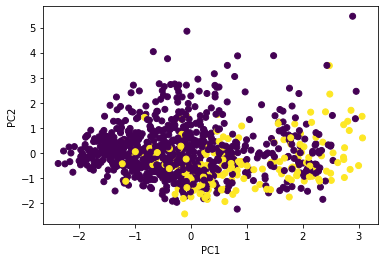

In [71]:
#Principal Component Analysis (PCA): PCA is a technique for reducing the dimensionality of high-dimensional datasets.
#In the stroke prediction dataset, we can use PCA to identify the most important features that contribute to the risk 
#of stroke.


from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data in two dimensions
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= Y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
#In this code, we first select a subset of features that we believe are important for predicting stroke risk.
#We then standardize the features using StandardScaler() to ensure that all features are on the same scale. 
#We apply PCA to the standardized features using PCA(n_components=2), which projects the data onto a two-dimensional
# subspace. We then visualize the data in two dimensions using a scatter plot, with the color of each point indicating
#whether the patient had a stroke or not.

In [72]:
from sklearn.decomposition import PCA
# Calculate the explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)

#The first principal component explains 45% of the total variance in the original dataset.
#The first two principal components together explain 78% of the total variance in the original dataset.
#The remaining variance, which is not captured by these two principal components, can be thought of as noise or unexplained variation in the original dataset

[0.42965375 0.76589364]


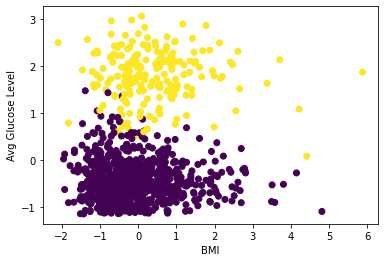

In [73]:
#K-Means Clustering: K-means clustering is a technique for grouping data points into a fixed number of clusters based 
#on their similarity. In the stroke prediction dataset, we can use K-means clustering to identify groups of patients 
#who have similar risk factors for stroke.



from sklearn.cluster import KMeans


# Load the data and select features

#features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
#X = data[features]

# Standardize the features
#scaler = StandardScaler()
#X = X_scaled

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap="viridis")
plt.xlabel("BMI")
plt.ylabel("Avg Glucose Level")
plt.show()

#In this code, we first select the same subset of features as in the PCA example, and standardize the features using 
#StandardScaler(). We apply K-means clustering to the standardized features using KMeans(n_clusters=2), which groups 
#the data points into two clusters based on their similarity. We then visualize the clusters in a scatter plot, with 
#the color of each point indicating which cluster it belongs to.

In [74]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette = silhouette_score(X_scaled, labels)
print("Silhouette score:", silhouette)

Silhouette score: 0.394479804498657


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the performance metrics
y_true = Y
y_pred = labels
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the performance metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  0.7544910179640718
Precision:  0.7526721018990211
Recall:  0.7544910179640718
F1 score:  0.753569593979124


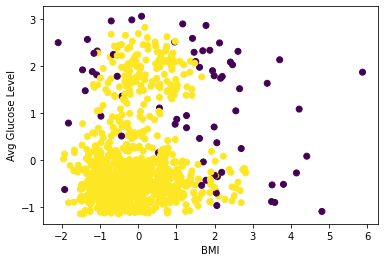

Silhouette score: 0.34693054419601166


In [76]:
#Density-Based Spatial Clustering of Applications with Noise (DBSCAN): DBSCAN is a clustering algorithm that groups 
#together data points that are close together in high-density regions and separates out low-density regions as noise. 
#In the stroke prediction dataset, we can use DBSCAN to identify patients who have similar risk factors for stroke 
#and identify any outliers that may represent rare or unusual cases.



from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap="viridis")
plt.xlabel("BMI")
plt.ylabel("Avg Glucose Level")
plt.show()

#The color black represents noise points which are not a part of any cluster

# Calculate the silhouette score
silhouette = silhouette_score(X_scaled, labels)
print("Silhouette score:", silhouette)


#In this code, we first select the same subset of features as in the K-means clustering example and standardize 
#the features using StandardScaler(). We apply DBSCAN to the standardized features 
#using DBSCAN(eps=0.5, min_samples=5), which groups the data points into clusters based on their density and 
#separates out low-density points as noise. We then visualize the clusters and noise points in a scatter plot, 
#with the color of each point indicating which cluster it belongs to.

Number of clusters: 2, Silhouette score: 0.393
Number of clusters: 3, Silhouette score: 0.163
Number of clusters: 4, Silhouette score: 0.119
Number of clusters: 5, Silhouette score: 0.179
Number of clusters: 6, Silhouette score: 0.266
Number of clusters: 7, Silhouette score: 0.263
Number of clusters: 8, Silhouette score: 0.238
Number of clusters: 9, Silhouette score: 0.231
Number of clusters: 10, Silhouette score: 0.230


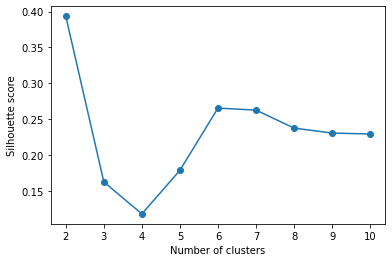

In [77]:
from sklearn.cluster import AgglomerativeClustering

# Determine the optimal number of clusters using the silhouette score
scores = []
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    print(f'Number of clusters: {k}, Silhouette score: {score:.3f}')

# Plot the silhouette scores
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

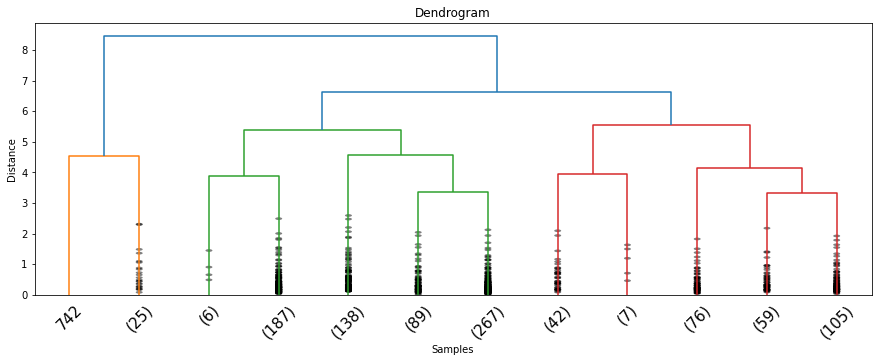

In [78]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Calculate the distance matrix using Euclidean distance
dist_matrix = pdist(X_scaled, metric='euclidean')

# Perform hierarchical clustering using the complete linkage method and 2 clusters
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
hc.fit(X_scaled)

# Plot the dendrogram
Z = linkage(dist_matrix, method='complete')
plt.figure(figsize=(15, 5))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [79]:
from sklearn.semi_supervised import LabelPropagation

In [80]:
n_labeled = int(len(x_train) * 0.1)
X_train_labeled = x_train[:n_labeled]
y_train_labeled = y_train[:n_labeled]
X_train_unlabeled = x_train[n_labeled:]

In [81]:
lp = LabelPropagation(kernel = 'rbf', gamma = 20)
lp.fit(X_train_labeled, y_train_labeled)
y_train_pred = lp.predict(X_train_unlabeled)
X_train_combined = np.concatenate([X_train_labeled, X_train_unlabeled])
y_train_combined = np.concatenate([y_train_labeled, y_train_pred])

Accuracy of classifier 1: 0.9024663677130045
Confusion matrix of classifier 1:


<AxesSubplot:>

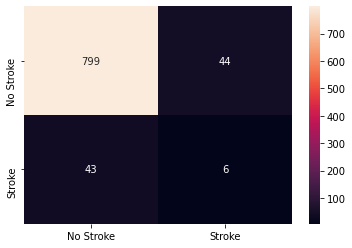

In [82]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_combined, y_train_combined)
y_test_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy of classifier 1:', accuracy)
print('Confusion matrix of classifier 1:')
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['No Stroke', 'Stroke'], columns=['No Stroke', 'Stroke'])
sns.heatmap(cm_df, annot=True, fmt='d')

Accuracy of classifier 2: 0.9417040358744395
Confusion matrix of classifier 2:


<AxesSubplot:>

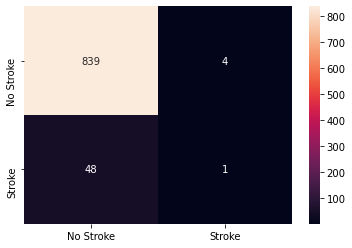

In [83]:
log = LogisticRegression()
log.fit(X_train_combined, y_train_combined)
y_test_pred = log.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy of classifier 2:', accuracy)
print('Confusion matrix of classifier 2:')
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['No Stroke', 'Stroke'], columns=['No Stroke', 'Stroke'])
sns.heatmap(cm_df, annot=True, fmt='d')

In [84]:
X_view1, X_view2, y_view1, y_view2 = train_test_split(x_train, y_train, test_size=0.5)
ctr1 = RandomForestClassifier()
ctr2 = DecisionTreeClassifier()
ctr1.fit(X_view1, y_view1)
ctr2.fit(X_view2, y_view2)
labeled = [(X_view1, y_view1), (X_view2, y_view2)]
unlabeled = [(x_test, y_test)]

In [86]:
while len(unlabeled) > 0:
    X_unlabeled, y_unlabeled = unlabeled.pop()
    y_pred = ctr2.predict(X_unlabeled)
    labeled.append((X_unlabeled, y_pred))
    if len(unlabeled) > 0:
        X_unlabeled, y_unlabeled = unlabeled.pop()
        y_pred = ctr1.predict(X_unlabeled)
        labeled.append((X_unlabeled, y_pred))
    X = np.concatenate(X)
    y = np.concatenate(y)
    ctr1.fit(X, y)
    ctr2.fit(X, y)
    
accuracy1 = ctr1.score(x_test, y_test)
accuracy2 = ctr2.score(x_test, y_test)

In [87]:
print(f'Accuracy of classifier 1: {accuracy1:.2f}')
print(f'Accuracy of classifier 2: {accuracy2:.2f}')

Accuracy of classifier 1: 0.87
Accuracy of classifier 2: 0.82
